In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
data = pd.read_excel('../data/pmb_data_universitas_xyz.xlsx')

In [25]:
label_encoders = {}
for column in ['Saluran Iklan', 'Lokasi', 'Sekolah Asal', 'Status Pendaftaran']:
    le  = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le 

In [27]:
X = data.drop(['Nama Calon Mahasiswa', 'Status Pendaftaran', 'Waktu Pendaftaran'], axis=1)
y = data['Status Pendaftaran']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

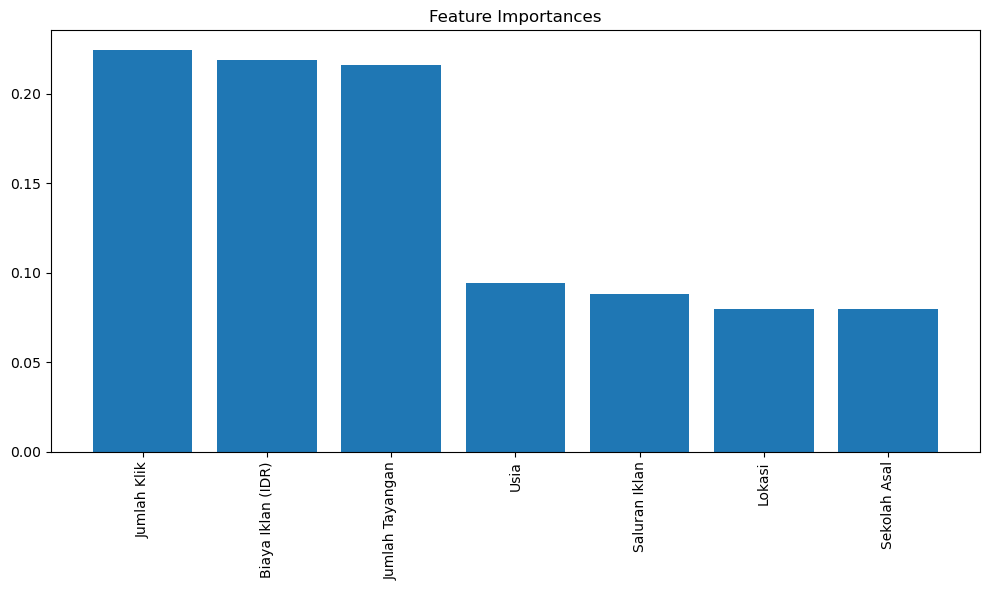

In [29]:
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()